In [1]:
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as TF


In [2]:
dataset = 'MNIST'
archs = ['conv', 'fc']
variants = ['NormalTrue', 'RandomNetTrue', 'RandomNetFalse']
priors = ['Normal5', 'Flow5', 'Flow10']

conv NormalTrue Normal5


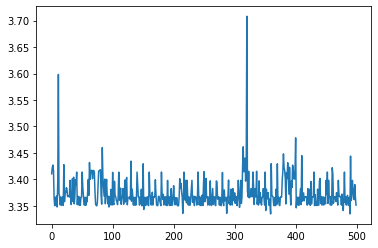

conv RandomNetTrue Normal5


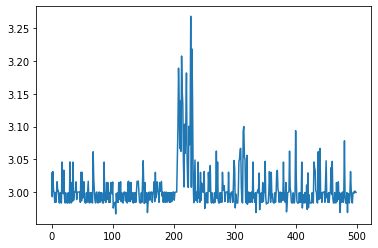

conv RandomNetFalse Normal5


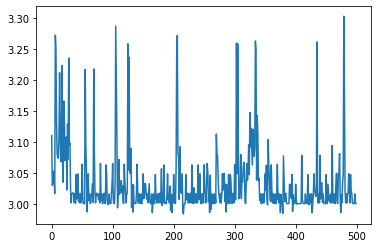

conv NormalTrue Flow5


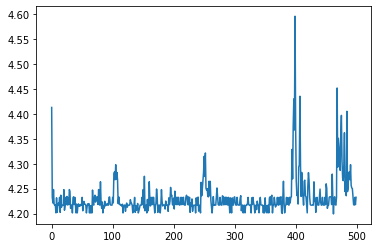

conv RandomNetTrue Flow5


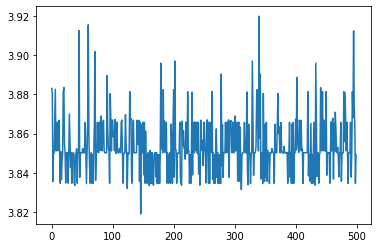

conv RandomNetFalse Flow5


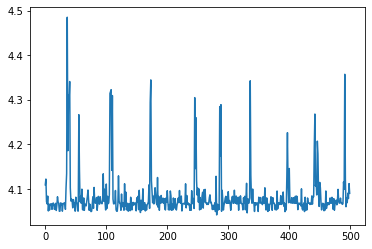

conv NormalTrue Flow10


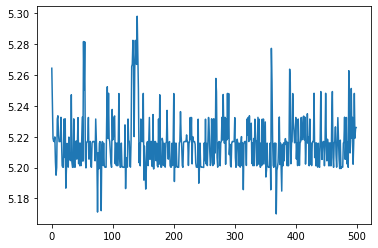

conv RandomNetTrue Flow10


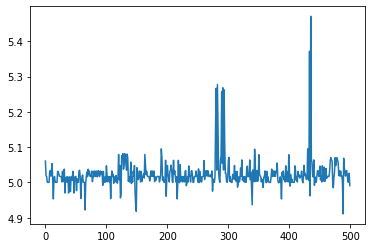

conv RandomNetFalse Flow10


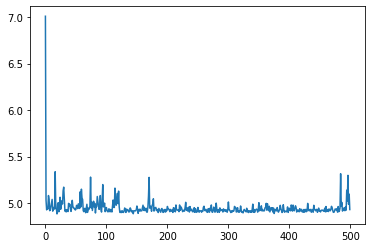

fc NormalTrue Normal5


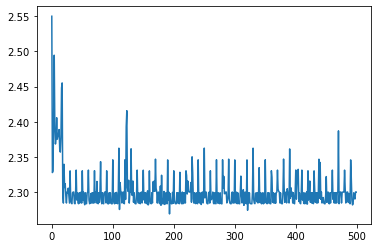

fc RandomNetTrue Normal5


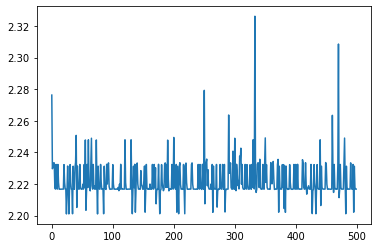

fc RandomNetFalse Normal5


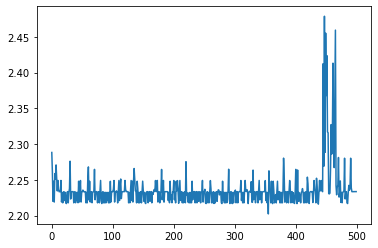

fc NormalTrue Flow5


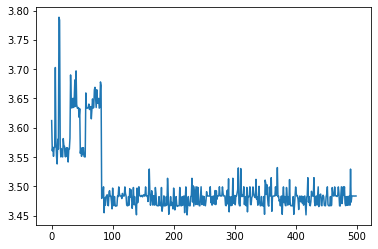

fc RandomNetTrue Flow5


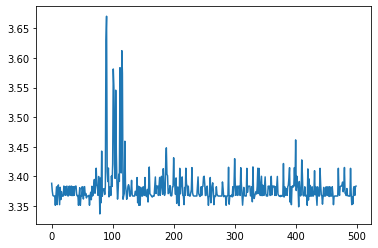

fc RandomNetFalse Flow5


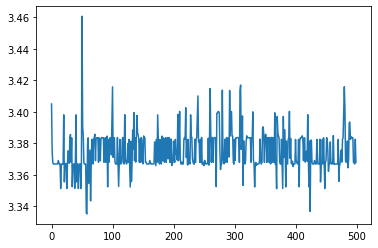

fc NormalTrue Flow10


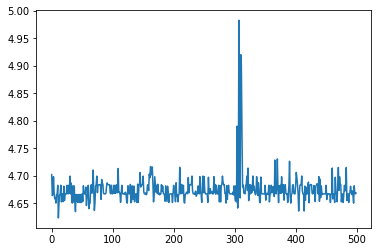

fc RandomNetTrue Flow10


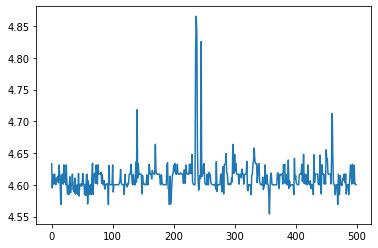

fc RandomNetFalse Flow10


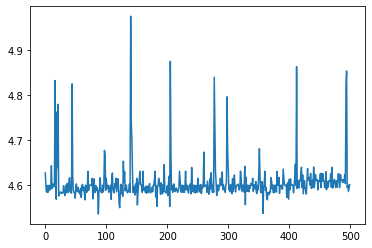

In [3]:
arrays = [['Architecture', 'Variant', 'Partial', 'Prior', 'Comp_time (mean)', 
           'Comp_time (std)', 'n_weights', 'losses', 'RE', 'stdn']]
for arch in archs:
    for prior in priors:
        for variant in variants:
            info = pickle.load(open(f'{dataset}/{arch}/{variant}/{prior}/info.p', 'rb'))
            array = [arch, info['Variant'], info['Partial'], info['Prior']+str(info['flows']), 
                     round(np.median(np.asarray(info['Times'])), 2), round(np.asarray(info['Times']).std(), 3),
                     info['n_weights'].item(), info['losses'][-1], 
                     info['RE'][-1], info['stdn'][-1]]
            arrays.append(array)
            print(arch, variant, prior)
            plt.plot(info['Times'])
            plt.show()

In [4]:
df = pd.DataFrame(arrays[1:], columns=arrays[0])
df['KL'] =  -(df['losses'] - df['RE'])
df['log_det_J'] = np.asarray([
            0,
            0,
            0,
            160,
            160,
            160,
            320,
            320,
            320,
            0,
            0,
            0,
            80,
            80,
            80,
            160,
            160,
            160   
            ])
df

,Architecture,Variant,Partial,Prior,Comp_time (mean),Comp_time (std),n_weights,losses,RE,stdn,KL,log_det_J
0,conv,Normal,True,Normal5,3.37,0.030,309,34.69,25.96,-1.42,-8.73,0
1,conv,RandomNet,True,Normal5,3.00,0.034,222,42.68,35.50,-1.42,-7.18,0
2,conv,RandomNet,False,Normal5,3.02,0.053,138,439.13,27.98,-0.94,-411.15,0
3,conv,Normal,True,Flow5,4.22,0.037,16629,-144.57,11.89,-1.42,156.46,160
4,conv,RandomNet,True,Flow5,3.85,0.014,16542,-137.67,18.72,-1.40,156.39,160
5,conv,RandomNet,False,Flow5,4.07,0.051,16458,-128.72,24.86,-0.94,153.58,160
6,conv,Normal,True,Flow10,5.22,0.017,32949,-301.65,12.37,-1.48,314.02,320
7,conv,RandomNet,True,Flow10,5.02,0.044,32862,-293.38,20.55,-1.55,313.93,320
8,conv,RandomNet,False,Flow10,4.93,0.109,32778,-283.63,29.56,-1.32,313.19,320
9,fc,Normal,True,Normal5,2.30,0.028,9616,20.63,11.77,-1.37,-8.86,0


In [5]:
df['KL_2'] = df['KL'] - df['log_det_J']
df

,Architecture,Variant,Partial,Prior,Comp_time (mean),Comp_time (std),n_weights,losses,RE,stdn,KL,log_det_J,KL_2
0,conv,Normal,True,Normal5,3.37,0.030,309,34.69,25.96,-1.42,-8.73,0,-8.73
1,conv,RandomNet,True,Normal5,3.00,0.034,222,42.68,35.50,-1.42,-7.18,0,-7.18
2,conv,RandomNet,False,Normal5,3.02,0.053,138,439.13,27.98,-0.94,-411.15,0,-411.15
3,conv,Normal,True,Flow5,4.22,0.037,16629,-144.57,11.89,-1.42,156.46,160,-3.54
4,conv,RandomNet,True,Flow5,3.85,0.014,16542,-137.67,18.72,-1.40,156.39,160,-3.61
5,conv,RandomNet,False,Flow5,4.07,0.051,16458,-128.72,24.86,-0.94,153.58,160,-6.42
6,conv,Normal,True,Flow10,5.22,0.017,32949,-301.65,12.37,-1.48,314.02,320,-5.98
7,conv,RandomNet,True,Flow10,5.02,0.044,32862,-293.38,20.55,-1.55,313.93,320,-6.07
8,conv,RandomNet,False,Flow10,4.93,0.109,32778,-283.63,29.56,-1.32,313.19,320,-6.81
9,fc,Normal,True,Normal5,2.30,0.028,9616,20.63,11.77,-1.37,-8.86,0,-8.86


In [6]:
pd.pivot_table(df, values=['Comp_time (mean)', 'Comp_time (std)'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

Comp_time (mean)                 Comp_time (std)  \
Variant                        Normal RandomNet                Normal   
Partial                         True      False True            True    
Architecture Prior                                                      
conv         Flow10              5.22      4.93  5.02           0.017   
             Flow5               4.22      4.07  3.85           0.037   
             Normal5             3.37      3.02  3.00           0.030   
fc           Flow10              4.67      4.60  4.60           0.027   
             Flow5               3.48      3.37  3.37           0.055   
             Normal5             2.30      2.23  2.22           0.028   

                                       
Variant              RandomNet         
Partial                  False  True   
Architecture Prior                     
conv         Flow10      0.109  0.044  
             Flow5       0.051  0.014  
             Normal5     0.053  0.034  
fc           Flow10      0.041  0.026  
             Flow5       0.013  0.032  
             Normal5     0.029  0.012

In [7]:
pd.pivot_table(df, values=['n_weights'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

n_weights                 
Variant                 Normal RandomNet       
Partial                  True      False  True 
Architecture Prior                             
conv         Flow10      32949     32778  32862
             Flow5       16629     16458  16542
             Normal5       309       138    222
fc           Flow10      41296     39040  39232
             Flow5       25456     23200  23392
             Normal5      9616      7360   7552

In [8]:
pd.pivot_table(df, values=['RE'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

RE                 
Variant              Normal RandomNet       
Partial               True      False  True 
Architecture Prior                          
conv         Flow10   12.37     29.56  20.55
             Flow5    11.89     24.86  18.72
             Normal5  25.96     27.98  35.50
fc           Flow10    4.13     10.86   9.18
             Flow5     3.11      7.44   6.74
             Normal5  11.77      7.35  16.27

In [9]:
pd.pivot_table(df, values=['KL'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

KL                  
Variant               Normal RandomNet        
Partial                True      False   True 
Architecture Prior                            
conv         Flow10   314.02    313.19  313.93
             Flow5    156.46    153.58  156.39
             Normal5   -8.73   -411.15   -7.18
fc           Flow10   156.28    153.40  156.24
             Flow5     77.43     73.35   77.29
             Normal5   -8.86   -206.24  -12.12

In [10]:
pd.pivot_table(df, values=['stdn'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

stdn                
Variant              Normal RandomNet      
Partial               True      False True 
Architecture Prior                         
conv         Flow10   -1.48     -1.32 -1.55
             Flow5    -1.42     -0.94 -1.40
             Normal5  -1.42     -0.94 -1.42
fc           Flow10   -1.24     -1.11 -1.28
             Flow5    -1.18     -1.16 -1.14
             Normal5  -1.37     -0.96 -1.34

In [11]:
pd.pivot_table(df, values=['losses'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

losses                  
Variant               Normal RandomNet        
Partial                True      False   True 
Architecture Prior                            
conv         Flow10  -301.65   -283.63 -293.38
             Flow5   -144.57   -128.72 -137.67
             Normal5   34.69    439.13   42.68
fc           Flow10  -152.15   -142.54 -147.06
             Flow5    -74.32    -65.91  -70.55
             Normal5   20.63    213.59   28.39

In [12]:
pd.pivot_table(df, values=['KL'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])

KL                  
Variant               Normal RandomNet        
Partial                True      False   True 
Architecture Prior                            
conv         Flow10   314.02    313.19  313.93
             Flow5    156.46    153.58  156.39
             Normal5   -8.73   -411.15   -7.18
fc           Flow10   156.28    153.40  156.24
             Flow5     77.43     73.35   77.29
             Normal5   -8.86   -206.24  -12.12

In [ ]:
pd.pivot_table(df, values=['KL_2'], index=['Architecture', 'Prior'], columns=['Variant', 'Partial'])